<a href="https://colab.research.google.com/github/byunsy/nasdaq-analysis/blob/main/NASDAQ_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NASDAQ Financial Analysis Study

## 00. Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as figure
import seaborn as sns
import warnings
import os
import csv

In [2]:
!pip install -q finance-datareader
import FinanceDataReader as fdr

## 01. Data Exploration

We are going to explore what the overall data looks like using Facebook stock (NASDAQ: FB).

In [3]:
# Attain Facebook stock data using FinanceDataReader module
facebook = fdr.DataReader('FB', '2013-01-01', '2020-12-31')

Let's take a look at its structure. We can see that it has six main columns--close, open, high, low, volume, and change--as well as the corresponding date. 

In [4]:
print("- "*35, "THE OLDEST DATA", "- "*35, sep="\n")
print(facebook.head(10), end="\n\n")
print("- "*35, "THE NEWEST DATA", "- "*35, sep="\n")
print(facebook.tail(10))

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
THE OLDEST DATA
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
            Close   Open   High    Low       Volume  Change
Date                                                       
2013-01-02  28.00  27.44  28.18  27.42   69840000.0  0.0518
2013-01-03  27.77  27.88  28.47  27.59   63140000.0 -0.0082
2013-01-04  28.76  28.01  28.93  27.83   72720000.0  0.0356
2013-01-07  29.42  28.69  29.79  28.65   83780000.0  0.0229
2013-01-08  29.06  29.51  29.60  28.86   45870000.0 -0.0122
2013-01-09  30.59  29.67  30.60  29.49  104790000.0  0.0526
2013-01-10  31.30  30.60  31.45  30.28   95320000.0  0.0232
2013-01-11  31.72  31.28  31.96  31.10   89600000.0  0.0134
2013-01-14  30.95  32.08  32.21  30.62   98890000.0 -0.0243
2013-01-15  30.10  30.64  31.71  29.88  173240000.0 -0.0275

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
THE NEWEST DATA
- - - - - - - - - - - - - - - - - 

Let's take a quick look at what we have for S&P500 and NASDAQ:

In [5]:
sp500 = fdr.StockListing('S&P500')
sp500.head(10)

,Symbol,Name,Sector,Industry
0,MMM,3M Company,Industrials,Industrial Conglomerates
1,ABT,Abbott Laboratories,Health Care,Health Care Equipment
2,ABBV,AbbVie Inc.,Health Care,Pharmaceuticals
3,ABMD,ABIOMED Inc,Health Care,Health Care Equipment
4,ACN,Accenture plc,Information Technology,IT Consulting & Other Services
5,ATVI,Activision Blizzard,Communication Services,Interactive Home Entertainment
6,ADBE,Adobe Inc.,Information Technology,Application Software
7,AMD,Advanced Micro Devices Inc,Information Technology,Semiconductors
8,AAP,Advance Auto Parts,Consumer Discretionary,Automotive Retail
9,AES,AES Corp,Utilities,Independent Power Producers & Energy Traders


In [6]:
print("Total number of companies:", len(sp500))

Total number of companies: 505


In [7]:
ns = fdr.StockListing('NASDAQ')
ns.head(10)

100%|██████████| 3328/3328 [00:36<00:00, 90.98it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,TSLA,Tesla Inc,자동차 및 자동차 부품,531010
4,FB,Facebook Inc Class A,소프트웨어 및 IT서비스,572010
5,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
6,GOOG,Alphabet Inc Class C,소프트웨어 및 IT서비스,572010
7,NVDA,NVIDIA Corp,반도체 및 반도체 장비,571010
8,PYPL,PayPal Holdings Inc,소프트웨어 및 IT서비스,572010
9,INTC,Intel Corp,반도체 및 반도체 장비,571010


In [8]:
print("Total number of companies:", len(ns))

Total number of companies: 3328


I'm going to be analyzing NASDAQ, but this analysis can also be applied to S&P500.

So, let's get NASDAQ Composite (IXIC):

In [9]:
ixic = fdr.DataReader("ixic", '2013-01-01', '2020-12-31')
print(ixic.head(10))

              Close     Open     High      Low       Volume  Change
Date                                                               
2013-01-02  3112.26  3091.33  3112.65  3083.49  482500000.0  0.0307
2013-01-03  3100.57  3108.49  3118.18  3092.28  379340000.0 -0.0038
2013-01-04  3101.66  3100.88  3108.44  3090.81  366400000.0  0.0004
2013-01-07  3098.81  3089.17  3102.35  3083.88  349040000.0 -0.0009
2013-01-08  3091.81  3098.46  3103.39  3076.60  372480000.0 -0.0023
2013-01-09  3105.81  3099.65  3111.22  3096.34  353260000.0  0.0045
2013-01-10  3121.76  3125.64  3127.72  3098.47  353220000.0  0.0051
2013-01-11  3125.64  3122.12  3126.59  3114.10  342670000.0  0.0012
2013-01-14  3117.50  3113.65  3123.48  3104.08  386850000.0 -0.0026
2013-01-15  3110.78  3101.06  3112.29  3093.32  374300000.0 -0.0022


Now, we can also visualize the dataframe we attained above. 

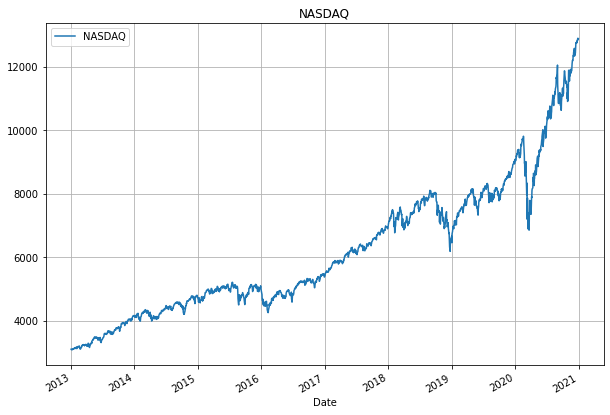

In [10]:
ns_plot = pd.DataFrame()
ns_plot["NASDAQ"] = ixic["Close"]

ns_plot.plot(figsize=(10, 7), title="NASDAQ", grid=True)

Perhaps it will be great if we compare the chart with one of the stocks. We will use Facebook once again. 

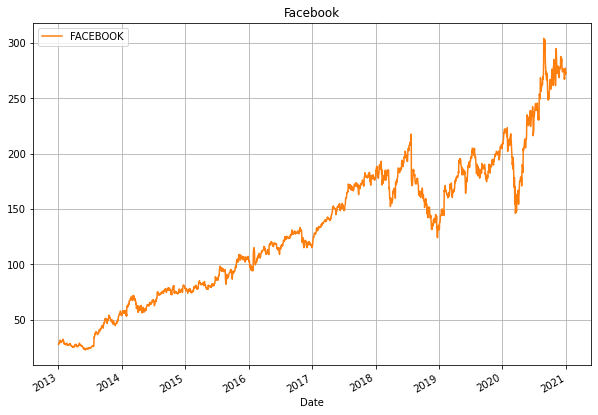

In [11]:
fb_plot = pd.DataFrame()
fb_plot["FACEBOOK"] = facebook["Close"]

fb_plot.plot(figsize=(10, 7), title="Facebook", grid=True, color="#ff7f0e")

Comparison of NASDAQ Composite and Facebook stock. 

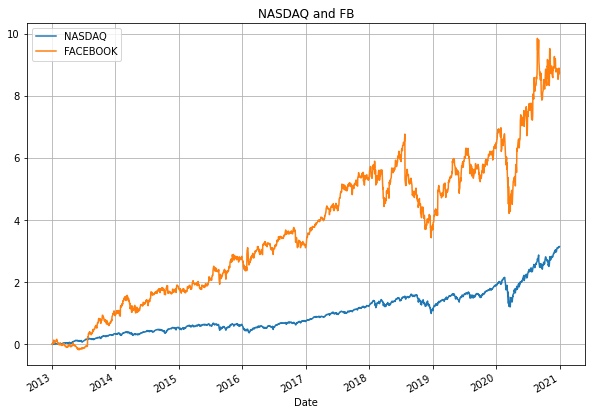

In [12]:
# Combine the two charts
df_plot = pd.DataFrame()
df_plot["NASDAQ"] = ixic["Close"]
df_plot["FACEBOOK"] = facebook["Close"]

# We subtract 1 just to get the percentage change
df_plot = df_plot / df_plot.iloc[0] - 1

df_plot.plot(figsize=(10, 7), title="NASDAQ and FB", grid=True)

**Note to self:**

ns_changes and fb_changes are dataframes consisting of every percentage change from the immediately previous row. For example, FB had 38.23 and 34.03 for its first and second close, respectively. Hence `(34.03-38.23)/38.23 = -0.1098`.

We add 1 to to continuously multiply the percentage change:
- 0.1 percent increase is simply 1.1
- 0.1 percent decrease is simply 0.9

Lastly, we subtract 1, once again, to get the percentage change.

In [13]:
ns_changes = ixic['Close'].pct_change()
ret = (ns_changes + 1).product() - 1

print("NASDAQ percentage change: {:.4f}%".format(ret))

NASDAQ percentage change: 3.1411%


In [14]:
fb_changes = facebook['Close'].pct_change()
ret = (fb_changes + 1).product() - 1

print("FACEBOOK percentage change: {:.4f}%".format(ret))

FACEBOOK percentage change: 8.7557%


From the calculations and charts above, we have seen we can use the time series data to quickly visualize and analyze stock prices. 

Let's move on to something more complex.

## 02. Data Analysis

### Create and write to CSV files

In [15]:
# Create a directory called nasdaq_prices, if not already there
ns_dir = "nasdaq_prices"

if not os.path.isdir(ns_dir):
    os.mkdir(ns_dir)

In [ ]:
for i, row in ns.iterrows():

    # filepaths are named after its symbol
    symbol = row['Symbol']
    csv_filepath = os.path.join(ns_dir, '{}.csv'.format(symbol))

    # If file already exists in directory
    if os.path.exists(csv_filepath):
        continue

    # Write fdr data (of 2020) into the corresponding csv files
    try:
        df = fdr.DataReader(symbol, '2020-01-01', '2020-12-31')
        df['Symbol'] = symbol
        df.to_csv(csv_filepath, quoting=csv.QUOTE_MINIMAL)
        print("{:25s} - {} rows completed.".format(csv_filepath, len(df))) 
        
    # Handle certain exceptions
    except ValueError as error:
        print(error)
    except IndexError as error:
        print(error)

In [17]:
print("nasdaq_prices include {} files.".format(len(os.listdir(ns_dir))))

nasdaq_prices include 3177 files.


Notice that we had 3,328 before, but now we have 3,177. It seems like there were no available data for some 151 companies.

Each csv file generated has the following structure:

In [18]:
test = pd.read_csv("/content/nasdaq_prices/FB.csv")
print(test.head(10))

         Date   Close    Open    High     Low      Volume  Change Symbol
0  2020-01-02  209.78  206.75  209.79  206.27  12090000.0  0.0221     FB
1  2020-01-03  208.67  207.21  210.40  206.95  11200000.0 -0.0053     FB
2  2020-01-06  212.60  206.70  212.78  206.52  17070000.0  0.0188     FB
3  2020-01-07  213.06  212.82  214.58  211.75  15110000.0  0.0022     FB
4  2020-01-08  215.22  213.00  216.24  212.61  13490000.0  0.0101     FB
5  2020-01-09  218.30  217.54  218.38  216.28  12680000.0  0.0143     FB
6  2020-01-10  218.06  219.20  219.88  217.42  12130000.0 -0.0011     FB
7  2020-01-13  221.91  219.60  221.97  219.21  14490000.0  0.0177     FB
8  2020-01-14  219.06  221.61  222.38  218.63  13320000.0 -0.0128     FB
9  2020-01-15  221.15  220.61  221.68  220.14  10040000.0  0.0095     FB


It looks similiar, but we now have 'Date' and 'Symbol' as columns. 

### Read from CSV files

Let's now create a new data frame called `df_prices` to collect all closing prices (as of 2020) in one huge data frame.

In [ ]:
# Initialize a data frame to collect all prices
df_price = pd.DataFrame() 

for i, row in ns.iterrows():

    # filepaths are named after its symbol
    symbol = row['Symbol']
    csv_filepath = os.path.join(ns_dir, '{}.csv'.format(symbol))

    # Read each csv file and extract its close price values
    try:
        df = pd.read_csv(csv_filepath, parse_dates=True, index_col='Date')
        df_price[symbol] = df['Close']

    # Handle certain exceptions
    except ValueError as error:
        print(error)
    except FileNotFoundError  as error:
        print(error)

In [20]:
print("Total number of companies in df:", len(df_price.columns))

Total number of companies in df: 3145


Once again, some of the companies did not seem to have data available, and we are finally down to a total of 3,145 companies to analyze. 

In [21]:
print("- "*40, "THE OLDEST DATA", "- "*40, sep="\n")
print(df_price.head(10))
print("- "*40, "THE NEWEST DATA", "- "*40, sep="\n")
print(df_price.tail(10))

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
THE OLDEST DATA
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
             AAPL    MSFT     AMZN    TSLA  ...   CETXP  STRRP  MDRRP  WTREP
Date                                        ...                             
2020-01-02  75.09  160.62  1898.01   86.05  ...  0.7700    NaN    NaN    NaN
2020-01-03  74.36  158.62  1874.97   88.60  ...  0.7099    NaN    NaN    NaN
2020-01-06  74.95  159.03  1902.88   90.31  ...  0.7492   5.10    NaN    NaN
2020-01-07  74.60  157.58  1906.86   93.81  ...  0.7300   5.48    NaN  25.50
2020-01-08  75.80  160.09  1891.97   98.43  ...  0.6501   5.48    NaN  25.80
2020-01-09  77.41  162.09  1901.05   96.27  ...  0.6533    NaN    NaN  25.50
2020-01-10  77.58  161.34  1883.16   95.63  ...  0.6200    NaN    NaN  25.49
2020-01-13  79.24  163.28  1891.30  104.97  ...     NaN   5.62    NaN  25.49
2020-01-14  78.17  162.13  1869.44  107.58  ...  0.6

We can see that we have successfully taken all valid companies and their closing prices for each business day in the year of 2020.

### Largest Percentage Change

Let's try to find stocks with the largest percentange change in 2020.

In [22]:
change = (df_price.pct_change() + 1).product() - 1.0
change = change.sort_values(ascending=False)

top_ten = change.head(10)
print(top_ten)

BTBT    65.393939
RZLT    59.000000
VRME    59.000000
CVLB    49.230769
TOMZ    37.083333
NVAX    23.835189
GMBL    22.518519
BLNK    21.619048
LCY     21.500000
GP      17.780645
dtype: float64


**Note:**

1. BTBT - Bit Digital: Bitcoin mining business.
2. RZLT - Rezolute: Clinical biopharmaceutical company.
3. VRME - VerifyMe: Security and protection software solutions.
4. CVLB - Conversion Labs: telemedicine company
5. TOMZ - TOMI Environmental Solutions: Decontamination and infection prevention company
6. NVAX - Novavax: Vaccine development company
7. GMBL - Esports Entertainment
8. BLNK - Blink Charging: Electric services company
9. LCY   - Landcadia Holdings: Blank check company
10. GP  - GreenPower Motor: Canadian electric bus manufacturer. 

We can now find all the closing price values of the top ten companies for the year of 2020.

In [23]:
df_price.loc["2020",top_ten.keys()].head(10)

,BTBT,RZLT,VRME,CVLB,TOMZ,NVAX,GMBL,BLNK,LCY,GP
Date,,,,,,,,,,
2020-01-02,NaN,NaN,0.0600,0.13,0.1200,4.49,0.27,1.890,0.002,1.55
2020-01-03,NaN,NaN,NaN,0.12,0.1250,4.44,NaN,1.930,NaN,1.73
2020-01-06,NaN,NaN,0.0701,0.12,NaN,4.58,NaN,1.910,NaN,1.57
2020-01-07,NaN,NaN,0.1171,NaN,0.0960,4.57,0.32,1.913,NaN,1.64
2020-01-08,NaN,NaN,0.1205,0.14,0.1200,4.28,NaN,1.890,NaN,1.56
2020-01-09,NaN,NaN,0.1250,0.14,0.1225,4.01,NaN,1.880,NaN,NaN
2020-01-10,NaN,NaN,0.1249,0.14,0.1250,3.93,0.28,1.975,0.002,NaN
2020-01-13,NaN,NaN,0.1283,0.12,0.1249,3.95,0.32,1.930,0.002,1.68
2020-01-14,NaN,NaN,0.1390,0.14,NaN,3.99,0.38,2.030,NaN,1.67


In [24]:
df_price.loc["2020",top_ten.keys()].tail(10)

,BTBT,RZLT,VRME,CVLB,TOMZ,NVAX,GMBL,BLNK,LCY,GP
Date,,,,,,,,,,
2020-12-17,5.51,18.2,3.40,7.40,4.08,131.75,5.96,35.210,0.040,17.80
2020-12-18,5.56,16.5,3.40,6.85,3.97,124.85,6.53,36.340,0.027,19.00
2020-12-21,6.25,14.6,3.39,7.20,4.09,124.06,7.04,37.620,0.050,20.16
2020-12-22,6.49,14.3,3.44,6.95,4.00,115.37,6.65,48.490,0.045,20.64
2020-12-23,5.95,15.2,3.70,7.30,4.77,127.65,7.17,43.770,0.038,22.95
2020-12-24,5.79,NaN,3.73,7.76,4.70,129.34,7.22,49.500,0.034,22.69
2020-12-28,10.49,14.7,4.00,7.27,4.27,116.85,7.01,46.900,NaN,28.75
2020-12-29,10.56,12.9,3.96,7.08,4.13,120.27,6.92,40.405,0.047,25.80
2020-12-30,15.15,13.6,3.71,6.95,4.83,118.96,6.70,45.240,0.043,29.62


### Data Visualizations

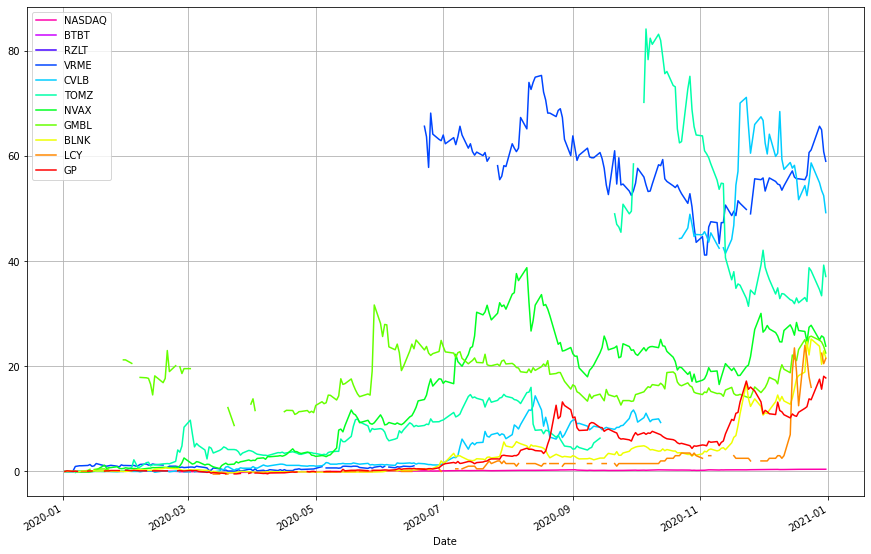

In [25]:
color_map = plt.cm.hsv_r(np.linspace(0.1, 1.0, 11))

df_plot = pd.DataFrame()

df_plot['NASDAQ'] = ixic.loc['2020', 'Close'] 
df_plot[top_ten.keys()] = df_price.loc['2020', top_ten.keys()]

df_plot = df_plot / df_plot.iloc[0] - 1
df_plot.plot(figsize=(15, 10), color=color_map, grid=True)

From the chart above, we can clearly see that some lines are fragmented, most likely due to lack of data. We can potentially fill the `NaN` values with the immediately preceeding value using forward-fill method. While this method does not give the most accurate data, it provides a convenient way to understand the overall data. 

Let's apply the `ffill` method: 

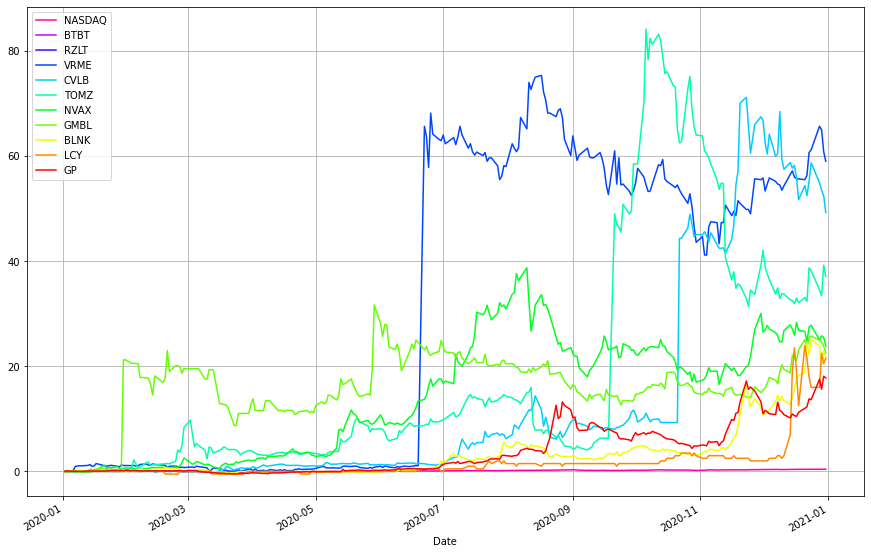

In [26]:
new_plot = df_plot.fillna(method='ffill')
new_plot.plot(figsize=(15, 10), color=color_map, grid=True)

However, I soon noticed there was a critical problem because the graph did not include `BTBT` or `RZLT` which were the top two companies. 

Going back up, I noticed that they did not have any data in the early 2020 (filled with `NaN`s). It's my guess that since we divide the entire data set with this `NaN` value, we have converted the two datasets into a bunch of `NaN`s. 

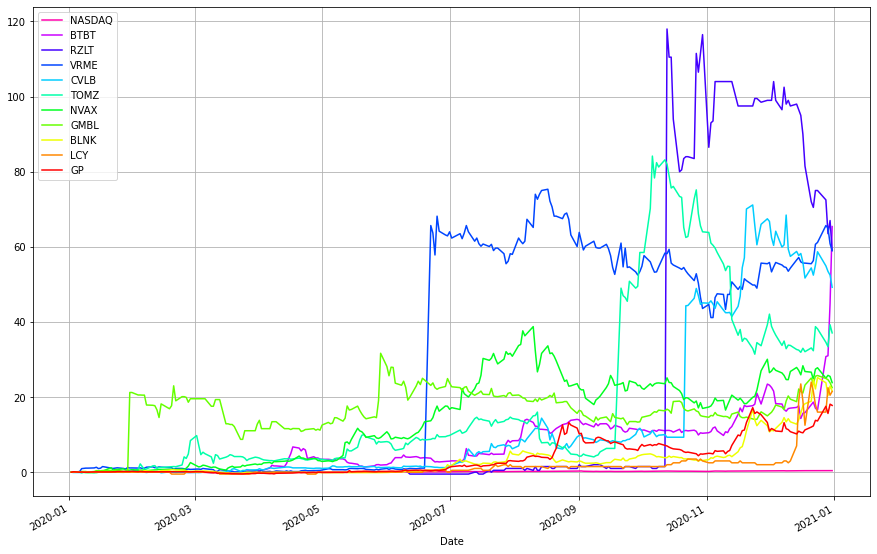

In [27]:
import math

df_plot = pd.DataFrame()

df_plot['NASDAQ'] = ixic.loc['2020', 'Close'] 
df_plot[top_ten.keys()] = df_price.loc['2020', top_ten.keys()]

for key in top_ten.keys():

    # if 2020-01-01 is NaN
    if math.isnan(df_plot[key].iloc[0]):
        first_valid = df_price[key].first_valid_index()
        df_plot[key] = df_plot[key] / (df_price[key].loc[first_valid]) - 1 

    else:
        df_plot[key] = df_plot[key] / df_plot[key].iloc[0] - 1

df_plot['NASDAQ'] = df_plot['NASDAQ'] / df_plot['NASDAQ'].iloc[0] - 1

new_plot = df_plot.fillna(method='ffill')
new_plot.plot(figsize=(15, 10), color=color_map, grid=True)

Out of curiosity, let's try to get the companies that did the worst (in terms of percentage change) in 2020.

In [28]:
returns = (df_price['2020'].pct_change() + 1).product() - 1.0
returns = returns.sort_values(ascending=False)

worst_ten = returns.tail(10)
print(worst_ten)

ACST   -0.863445
NVIV   -0.871490
NAKD   -0.885030
JFU    -0.890526
APRE   -0.891391
CTRM   -0.902836
SNDE   -0.904132
INPX   -0.931081
TOPS   -0.938344
GLBS   -0.942648
dtype: float64


We use the same method as before.

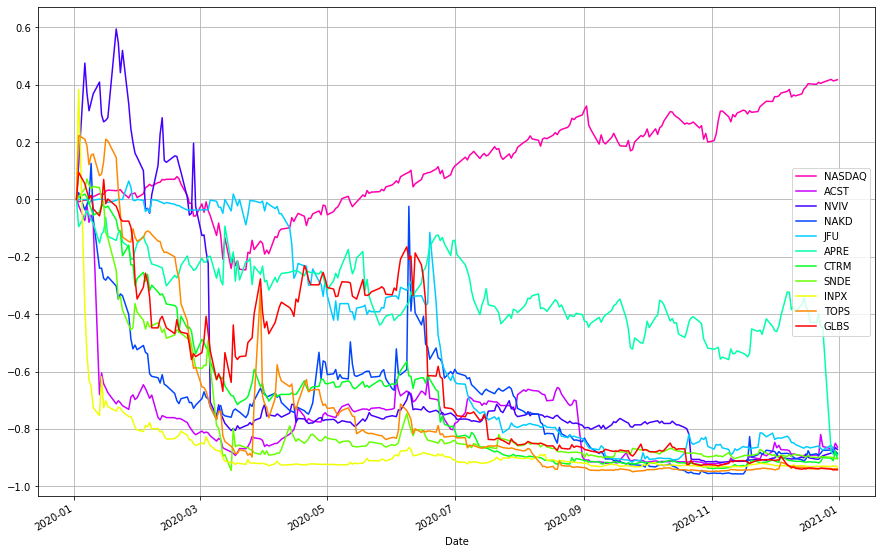

In [29]:
df_plot = pd.DataFrame()

df_plot['NASDAQ'] = ixic.loc['2020', 'Close'] 
df_plot[worst_ten.keys()] = df_price.loc['2020', worst_ten.keys()]

for key in worst_ten.keys():

    if math.isnan(df_plot[key].iloc[0]):
        first_valid = df_price[key].first_valid_index()
        df_plot[key] = df_plot[key] / (df_price[key].loc[first_valid]) - 1 
        
    else:
        df_plot[key] = df_plot[key] / df_plot[key].iloc[0] - 1

df_plot['NASDAQ'] = df_plot['NASDAQ'] / df_plot['NASDAQ'].iloc[0] - 1

new_plot = df_plot.fillna(method='ffill')
new_plot.plot(figsize=(15, 10), color=color_map, grid=True)

### Correlations

We are now going to be looking at simple correlations between every pair of stock items in the top-twenty companies.    

In [30]:
returns = (df_price['2020'].pct_change() + 1).product() - 1.0
returns = returns.sort_values(ascending=False)

top_twenty = returns.head(20)
print(top_twenty)

BTBT    65.393939
RZLT    59.000000
VRME    59.000000
CVLB    49.230769
TOMZ    37.083333
NVAX    23.835189
GMBL    22.518519
BLNK    21.619048
LCY     21.500000
GP      17.780645
BEEM    15.144420
VXRT    14.861111
KIRK    13.536585
CRDF    13.392000
INVO    12.935185
RIOT    12.926230
CYTH    12.593750
GNPX    12.378466
OAS     10.545171
VERI    10.245059
dtype: float64


We create a data frame with all the closing prices for top twenty companies in the year of 2020.

In [31]:
df = pd.DataFrame()

df['NASDAQ'] = ixic.loc['2020', 'Close']
df[top_twenty.keys()] = df_price.loc['2020', top_twenty.keys()]

print(df.tail(10))

              NASDAQ   BTBT  RZLT  VRME  ...    CYTH  GNPX    OAS   VERI
Date                                     ...                            
2020-12-17  12764.75   5.51  18.2  3.40  ...  4.7400  3.74  38.60  26.56
2020-12-18  12755.64   5.56  16.5  3.40  ...  5.5900  3.56  38.66  25.50
2020-12-21  12742.52   6.25  14.6  3.39  ...  6.3900  3.98  38.95  27.63
2020-12-22  12807.92   6.49  14.3  3.44  ...  5.7800  4.47  38.50  30.29
2020-12-23  12771.11   5.95  15.2  3.70  ...  5.1800  5.51  37.88  29.35
2020-12-24  12804.73   5.79   NaN  3.73  ...  5.1101  4.69  37.36  30.69
2020-12-28  12899.42  10.49  14.7  4.00  ...  4.6700  4.75  37.38  29.47
2020-12-29  12850.22  10.56  12.9  3.96  ...  4.3400  4.46  37.35  28.03
2020-12-30  12870.00  15.15  13.6  3.71  ...  4.4400  4.42  37.22  29.11
2020-12-31  12888.28  21.91  12.0  3.60  ...  4.3500  4.15  37.06  28.45

[10 rows x 21 columns]


Afterwards, we get the percentage change and correlations using the convenient `corr()` method.

In [32]:
df_changes = df.pct_change()
correlation = df_changes.corr()

print(correlation)

          NASDAQ      BTBT      RZLT  ...      GNPX       OAS      VERI
NASDAQ  1.000000  0.173484 -0.021161  ...  0.185152 -0.011855  0.364314
BTBT    0.173484  1.000000 -0.016224  ...  0.020948 -0.024334  0.224114
RZLT   -0.021161 -0.016224  1.000000  ...  0.005230 -0.006614 -0.046389
VRME    0.035966 -0.033876 -0.007653  ...  0.005364 -0.004444  0.068327
CVLB    0.081502  0.009997 -0.031719  ...  0.029091  0.052505  0.066421
TOMZ   -0.050102 -0.060784 -0.010066  ... -0.029434 -0.008109 -0.112971
NVAX    0.143527 -0.083244  0.068772  ...  0.373249 -0.009298  0.126261
GMBL    0.014590 -0.021326  0.029756  ...  0.018308 -0.003522  0.019270
BLNK    0.308404  0.051438 -0.017634  ...  0.068036  0.139714  0.081726
LCY     0.026565 -0.009771  0.067296  ... -0.000713 -0.009823 -0.006509
GP      0.193942  0.109202 -0.030245  ...  0.034164  0.090606 -0.042871
BEEM    0.336819  0.089364 -0.029662  ...  0.097641  0.130508  0.092168
VXRT   -0.072740 -0.018250  0.050923  ...  0.210419  0.026475  0

Finally, we can visualize the all the individual correlations.

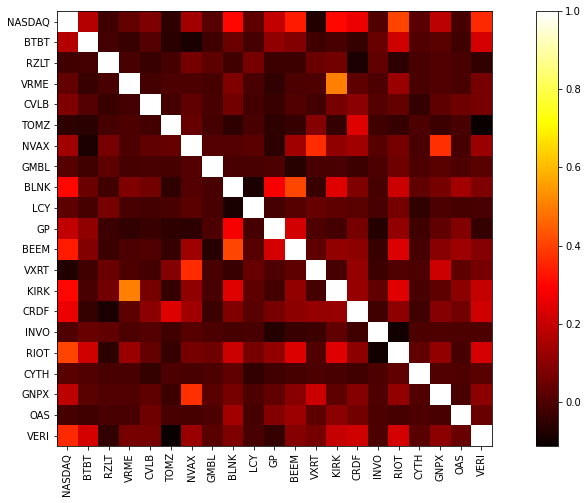

In [33]:
plt.figure(figsize=(16,8))
plt.grid(False)
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

Let's take a look at the strongest correlations within this chart.

In [34]:
# Iterate through the items and store the correlation between two items
idx, vals = [], []
for ix, item1 in enumerate(correlation.columns):
    for item2 in correlation.columns[ix + 1:]:
        idx.append((item1, item2))
        vals.append(correlation[item1][item2])

# Make it into a series
corr_series = pd.Series(index=idx, data=vals)
corr_series_sorted = corr_series.sort_values(ascending=False)
corr_series_sorted[:20]

(VRME, KIRK)      0.508448
(BLNK, BEEM)      0.409514
(NASDAQ, RIOT)    0.406983
(NVAX, GNPX)      0.373249
(NVAX, VXRT)      0.367849
(NASDAQ, VERI)    0.364314
(NASDAQ, BEEM)    0.336819
(NASDAQ, BLNK)    0.308404
(NASDAQ, KIRK)    0.306299
(BLNK, GP)        0.280703
(NASDAQ, CRDF)    0.262565
(KIRK, RIOT)      0.246877
(BLNK, KIRK)      0.239867
(TOMZ, CRDF)      0.239227
(BEEM, RIOT)      0.236083
(RIOT, VERI)      0.225316
(BTBT, VERI)      0.224114
(GP, BEEM)        0.221504
(CRDF, VERI)      0.217082
(BTBT, RIOT)      0.213945
dtype: float64

From what we found above, it does not seem like there are any strong and solid correlation between any pair of stock items. 

This is perhaps because we have blindly used the top twenty companies that had the largest percentage change in the year of 2020. Would it be different if we perform a similar analysis on leading companies in the United States?

In [35]:
best_20 = ns['Symbol'].head(20)

df_price.loc["2020", best_20].head(10)

,AAPL,MSFT,AMZN,TSLA,FB,GOOGL,GOOG,NVDA,PYPL,INTC,ASML,CMCSA,ADBE,NFLX,PDD,PEP,CSCO,AVGO,QCOM,COST
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,75.09,160.62,1898.01,86.05,209.78,1368.68,1367.37,239.91,110.75,60.84,302.83,45.37,334.43,329.81,41.23,135.82,48.42,322.39,88.69,291.49
2020-01-03,74.36,158.62,1874.97,88.60,208.67,1361.52,1360.66,236.07,108.76,60.10,297.95,45.01,331.81,325.90,40.89,135.63,47.63,314.19,87.02,291.73
2020-01-06,74.95,159.03,1902.88,90.31,212.60,1397.81,1394.21,237.06,110.17,59.93,295.58,44.67,333.71,335.83,40.09,136.15,47.80,313.72,86.51,291.81
2020-01-07,74.60,157.58,1906.86,93.81,213.06,1395.11,1393.34,239.93,109.67,58.93,298.79,44.93,333.39,330.75,41.21,134.01,47.49,312.64,88.97,291.35
2020-01-08,75.80,160.09,1891.97,98.43,215.22,1405.04,1404.32,240.38,111.82,58.97,301.89,45.39,337.87,339.26,40.50,134.70,47.52,308.74,88.71,294.69
2020-01-09,77.41,162.09,1901.05,96.27,218.30,1419.79,1419.83,243.02,112.57,59.30,301.38,45.51,340.45,335.66,39.66,134.79,47.32,306.26,89.91,299.42
2020-01-10,77.58,161.34,1883.16,95.63,218.06,1428.96,1429.73,244.32,112.93,58.94,296.18,44.98,339.81,329.05,38.42,134.53,47.13,299.22,90.26,297.24
2020-01-13,79.24,163.28,1891.30,104.97,221.91,1440.03,1439.23,251.98,115.28,59.59,301.45,45.80,345.63,338.92,39.35,136.53,47.97,301.18,90.97,299.87
2020-01-14,78.17,162.13,1869.44,107.58,219.06,1430.59,1430.88,247.28,114.64,59.43,302.55,46.03,344.63,338.69,38.02,136.85,47.79,308.18,90.56,299.75


In [36]:
df = pd.DataFrame()

df['NASDAQ'] = ixic.loc['2020', 'Close']
df[best_20] = df_price.loc["2020", best_20].head(10)

In [37]:
df_changes = df.pct_change()
correlation = df_changes.corr()

print(correlation)

          NASDAQ      AAPL      MSFT  ...      AVGO      QCOM      COST
NASDAQ  1.000000  0.042120  0.042570  ...  0.012034  0.017803  0.032437
AAPL    0.042120  1.000000  0.856742  ... -0.141633  0.334080  0.755047
MSFT    0.042570  0.856742  1.000000  ... -0.024748  0.105264  0.792375
AMZN    0.030707  0.429056  0.320912  ...  0.296108  0.355890  0.126458
TSLA    0.013731  0.366035  0.157915  ...  0.105638  0.186158  0.309093
FB      0.037276  0.831215  0.750064  ... -0.264295  0.220881  0.661226
GOOGL   0.027967  0.654693  0.547433  ... -0.263867  0.048099  0.390746
GOOG    0.027577  0.662901  0.550859  ... -0.292768  0.082913  0.412547
NVDA    0.035613  0.781100  0.528299  ...  0.007337  0.673260  0.377726
PYPL    0.042172  0.859133  0.862586  ...  0.037908  0.232854  0.568670
INTC    0.033848  0.580843  0.634497  ...  0.475422  0.002426  0.378644
ASML    0.028992  0.363126  0.413991  ...  0.596772  0.529043  0.384097
CMCSA   0.028821  0.435876  0.583345  ...  0.349081  0.346073  0

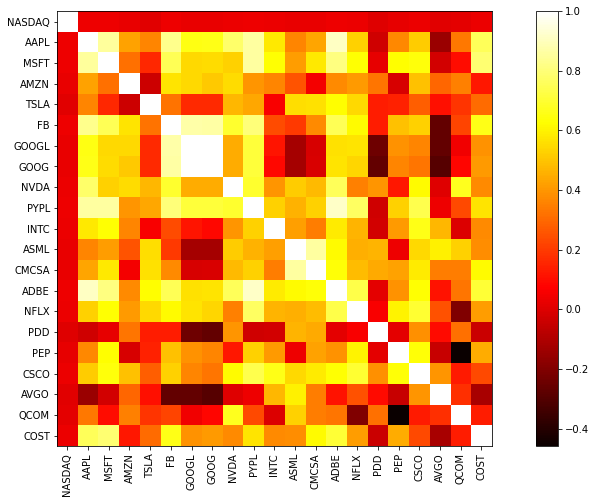

In [38]:
plt.figure(figsize=(16,8))
plt.grid(False)
plt.imshow(correlation, cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(correlation)), correlation.columns, rotation=90)
plt.yticks(range(len(correlation)), correlation.columns)
plt.show()

In [39]:
# Iterate through the items and store the correlation between two items
idx, vals = [], []
for ix, item1 in enumerate(correlation.columns):
    for item2 in correlation.columns[ix + 1:]:
        idx.append((item1, item2))
        vals.append(correlation[item1][item2])

# Make it into a series
corr_series = pd.Series(index=idx, data=vals)
corr_series_sorted = corr_series.sort_values(ascending=False)
corr_series_sorted[:20]

(GOOGL, GOOG)    0.997072
(PYPL, ADBE)     0.918846
(AAPL, ADBE)     0.913209
(FB, GOOGL)      0.869805
(FB, GOOG)       0.868693
(MSFT, PYPL)     0.862586
(ASML, CMCSA)    0.861639
(AAPL, PYPL)     0.859133
(AAPL, MSFT)     0.856742
(AAPL, FB)       0.831215
(MSFT, ADBE)     0.814759
(FB, PYPL)       0.803566
(MSFT, COST)     0.792375
(AAPL, NVDA)     0.781100
(PYPL, NFLX)     0.767900
(NVDA, ADBE)     0.757086
(AAPL, COST)     0.755047
(MSFT, FB)       0.750064
(FB, ADBE)       0.749890
(PYPL, CSCO)     0.741480
dtype: float64

Now, compared to the previous correlation chart, we can see much stronger correlations going on here.  